#### Income Group Classification

#### Objective

1. Understand the different factors that influence the income of an individual.
2. To build a prediction model that can help the government formulate policies for the right pockets of the society.


#### Data Dictionary

The data contains characteristics of the people

* `age`: continuous - age of a Person 
* `workclass`: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* `fnlwgt`: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* `education`: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* `education-num`: no. of years a person studied - continuous.
* `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* `relationship` : Relationship of the person with the dependent member. Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* `sex`: Female, Male.
* `capital-gain`: Investment gain of the person other than salary - continuous
* `capital-loss`: Loss from investments - continuous
* `hours-per-week`: No. of hours a person works - continuous.
* `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* `salary`: >50K, <=50K (dependent variable, the salary is in Dollars per year)

#### Import Libraries

In [1]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To do data preprocessing
from sklearn.impute import SimpleImputer

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#### Load data

In [2]:
who = pd.read_csv("data/19_who_data.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

#### Review top 5 rows

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Shape of the input dataset

In [5]:
data.shape

(32561, 15)

* The dataset has 32561 rows and 14 columns 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

#### Create Numerical and Categorical columns for later use

In [7]:
# Create Numerical and Categorical columns for later use

# numeric_cols = data.select_dtypes(include=[np.number]).columns
# cat_cols = data.describe(include=["object"]).columns

numeric_cols = data.select_dtypes(include='number').columns.tolist()
cat_cols = data.select_dtypes(include='object').columns.tolist()

print("Categorical Columns:     ", cat_cols)
print("Numeric Columns:    ", numeric_cols)

Categorical Columns:      ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']
Numeric Columns:     ['age', 'fnlwgt', 'education_no_of_years', 'capital_gain', 'capital_loss', 'working_hours_per_week']


#### Summary of the numerical data

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

#### Check Unique Values in Categorical Features

In [9]:
# Checking value counts of categorical variables
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts(1))
    print("*" * 50)

Unique values in workclass are :
workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: proportion, dtype: float64
**************************************************
Unique values in education are :
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64
**************************************************
Unique values in marital_status are :
marital_status
Married-civ-spouse       0.45993

* There are some values represented by a '?' in `workclass`, `occupation`, and `native_country` columns which we should investigate further.
* There are many distinct values in `native_country` that can be reduced to their respective continents.
* The distinct levels of `marital_status` can also be reduced.

#### Data Cleaning

*We can assume that wherever there is a ? the data is unknown or missing. Let us see if there is a pattern in the missingness.*

#### `workclass`

In [10]:
data[data["workclass"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
29128,18,?,113185,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,<=50K
8241,20,?,194096,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
22387,22,?,224238,Some-college,10,Never-married,?,Own-child,White,Male,0,0,2,United-States,<=50K
26295,23,?,283806,9th,5,Divorced,?,Not-in-family,White,Female,0,0,35,United-States,<=50K
4752,60,?,199947,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,32,United-States,<=50K


* *From the sample it looks like wherever workclass is missing occupation is also missing.*
* *It looks like for `?` observations in workclass the native country is the United States.*

In [11]:
data[data["workclass"] == " ?"]["occupation"].value_counts()

occupation
?    1836
Name: count, dtype: int64

* *It is indeed true that wherever `workclass` has `?` the `occupation` is also `?`*
* *This indicates there is a strong pattern in the missingness of `workclass` and `occupation`. This is intuitive as well because both the columns are capturing similar information.*

In [12]:
data[data["workclass"] == " ?"]["native_country"].value_counts()

native_country
United-States         1659
Mexico                  33
?                       27
Canada                  14
Philippines             10
South                    9
Germany                  9
Taiwan                   9
China                    7
El-Salvador              6
Italy                    5
Puerto-Rico              5
Poland                   4
England                  4
Portugal                 3
Columbia                 3
Vietnam                  3
Dominican-Republic       3
Japan                    3
Cuba                     3
Haiti                    2
France                   2
Ecuador                  1
Peru                     1
Cambodia                 1
Thailand                 1
Honduras                 1
Laos                     1
Hong                     1
Guatemala                1
Trinadad&Tobago          1
Iran                     1
Nicaragua                1
Jamaica                  1
Scotland                 1
Name: count, dtype: int64

* *So these missing `?` can be from any `native_country`*

#### `occupation`

In [13]:
data[data["occupation"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
16221,21,?,262062,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
23755,72,?,271352,10th,6,Divorced,?,Not-in-family,White,Male,0,0,12,United-States,<=50K
10143,35,?,164866,10th,6,Divorced,?,Not-in-family,White,Male,0,0,99,United-States,<=50K
25522,66,?,108185,9th,5,Married-civ-spouse,?,Husband,Black,Male,0,0,40,United-States,<=50K
25929,44,?,195488,12th,8,Separated,?,Not-in-family,White,Female,0,0,36,Puerto-Rico,<=50K


In [14]:
data[data["occupation"] == " ?"]["workclass"].value_counts()

workclass
?               1836
Never-worked       7
Name: count, dtype: int64

* *We observe the same pattern here, where `occupation` is `?` most of the values in `workclass` are `?`.*

In [15]:
data[data["occupation"] == " ?"]["native_country"].value_counts()

native_country
United-States         1666
Mexico                  33
?                       27
Canada                  14
Philippines             10
South                    9
Germany                  9
Taiwan                   9
China                    7
El-Salvador              6
Italy                    5
Puerto-Rico              5
Poland                   4
England                  4
Portugal                 3
Columbia                 3
Vietnam                  3
Dominican-Republic       3
Japan                    3
Cuba                     3
Haiti                    2
France                   2
Ecuador                  1
Peru                     1
Cambodia                 1
Thailand                 1
Honduras                 1
Laos                     1
Hong                     1
Guatemala                1
Trinadad&Tobago          1
Iran                     1
Nicaragua                1
Jamaica                  1
Scotland                 1
Name: count, dtype: int64

* *So these missing `?` can be from any `native_country`*

#### `native_country`

In [16]:
data[data["native_country"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
6319,38,Private,189404,HS-grad,9,Married-spouse-absent,Other-service,Not-in-family,White,Male,0,0,35,?,<=50K
15863,34,Private,220631,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Male,0,0,50,?,<=50K
7253,48,Private,166929,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,?,>50K
28124,33,Self-emp-not-inc,182926,Bachelors,13,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,?,<=50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K


In [17]:
data[data["native_country"] == " ?"]["occupation"].value_counts()

occupation
Prof-specialty       102
Other-service         83
Exec-managerial       74
Craft-repair          69
Sales                 66
Adm-clerical          49
Machine-op-inspct     36
?                     27
Transport-moving      25
Handlers-cleaners     20
Tech-support          16
Priv-house-serv        6
Farming-fishing        5
Protective-serv        5
Name: count, dtype: int64

In [18]:
data[data["native_country"] == " ?"]["workclass"].value_counts()

workclass
Private             410
Self-emp-not-inc     42
Self-emp-inc         42
?                    27
Local-gov            26
State-gov            19
Federal-gov          17
Name: count, dtype: int64

* *There is no clear pattern here.*

#### Observations:
* *We observe that all the observations where `workclass` = `?` the values in the `occupation` are `?`*
* *The strong pattern between `workclass` and `occupation` makes sense as both of these variables capture similar information.*
* *There is no strong correlation of `?` observations in `occupation` and `workclass` with `native_country`.*
* *For now we will replace these `?`'s with the `unknown` category.*

#### Replacing `?` with `Unknown`

In [19]:
# Replace " ?" with np.nan first
data.replace(" ?", np.nan, inplace=True)

# Define categorical columns to impute
replace_cols = ['workclass', 'native_country', 'occupation']

# Create and apply the imputer
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
data[replace_cols] = imputer.fit_transform(data[replace_cols])

#### Mapping countries to continents to reduce the number of unique values.

In [20]:
data.native_country.nunique()

42

* There are 42 distinct countries in the data set, we can reduce them to their respective continents as this will help us reduce the dimension of data.

In [21]:
data.native_country = data.native_country.str.replace(" ", "")  # remove empty spaces from strings

In [22]:
north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
]
asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam",
]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia",
]
other = ["South", "Unknown", "?"]

In [23]:
def region_combining(x):
    if x in north_america:
        return "north_america"
    elif x in asia:
        return "asia"
    elif x in south_america:
        return "south_america"
    elif x in europe:
        return "europe"
    elif x in other:
        return "other"
    else:
        return x

In [24]:
data["native_country"] = data["native_country"].apply(region_combining)

In [25]:
print("Distinct values in Native Country column:", data.native_country.nunique())

Distinct values in Native Country column: 5


#### Reducing the number of distinct values in `marital_status`

In [26]:
data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

We can reduce these values into the following groups:
* Married
* Not-Married
* Never-Married

In [27]:
data.marital_status = data.marital_status.str.replace(" ", "")  # remove empty spaces from strings

married = ["Married-civ-spouse", "Married-AF-spouse"]
not_married = ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]


def reduce_marital_status(x):
    if x in married:
        return "married"
    elif x in not_married:
        return "not_married"
    else:
        return x

In [28]:
data.marital_status = data.marital_status.apply(reduce_marital_status)

In [29]:
data.marital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

* Values have been clubbed into three categories.

In [30]:
df_clean = data.copy()

#### functions to aid visualization

In [31]:
# Function to create a histogram and boxplot combined for visualization of numerical features
def histogram_boxplot(data, feature, figsize=(10, 5)):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=True, ax=ax_hist2, color='skyblue')  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [32]:
# Function to plot count and percentage barplots side by side
def plot_count_and_percentage_barplot(data, column, figsize=(12, 5)):
    """
    Plots two countplots side by side: one with count labels, one with percentage labels.
    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The column to plot.
        figsize (tuple): Figure size for the plots.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    categories = data[column].value_counts().index
    total = len(data)
    
    # Countplot with count labels
    ax1 = sns.countplot(data=data, x=column, hue=column, order=categories, ax=axes[0], palette='Set2')
    axes[0].set_title('Counts per ' + column)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=90)
    for p in ax1.patches:
        count = int(p.get_height())
        ax1.annotate(str(count), (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    
    # Countplot with percentage labels
    ax2 = sns.countplot(data=data, x=column, hue=column, order=categories, ax=axes[1], palette='Set2')
    axes[1].set_title('Percentage per ' + column)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Percentage')
    axes[1].tick_params(axis='x', rotation=90)
    for p in ax2.patches:
        percent = 100 * p.get_height() / total
        ax2.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='blue')
    
    plt.tight_layout()
    plt.show()

In [33]:
# function to plot stacked percentage bar chart
def plot_stacked_percentage_bar(data, x_col, hue_col, colormap='tab20', figsize=(6, 4), title=None):
    """
    Plots a stacked bar chart showing percentage distribution of hue_col within each x_col category.

    Parameters:
    - data: pandas DataFrame
    - x_col: column name for x-axis categories (e.g., 'Risk')
    - hue_col: column name for stacked segments (e.g., 'Sex')
    - colormap: matplotlib colormap name (default: 'tab20')
    - figsize: tuple for figure size
    - title: optional plot title
    """
    # Group and calculate percentages
    grouped = data.groupby([x_col, hue_col]).size().unstack(fill_value=0)
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

    # Plot
    ax = percentages.plot(kind='bar', stacked=True, figsize=figsize, colormap=colormap)

    plt.ylabel('Percentage')
    plt.title(title or f'{x_col} Distribution by {hue_col} (Stacked Percentage)')
    # Place legend outside the plot to avoid overlap
    plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

#### Univariate Analysis on Numerical Data

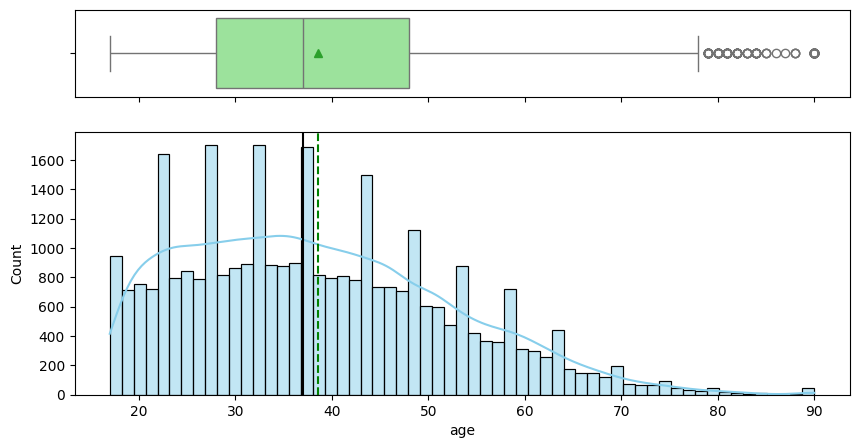

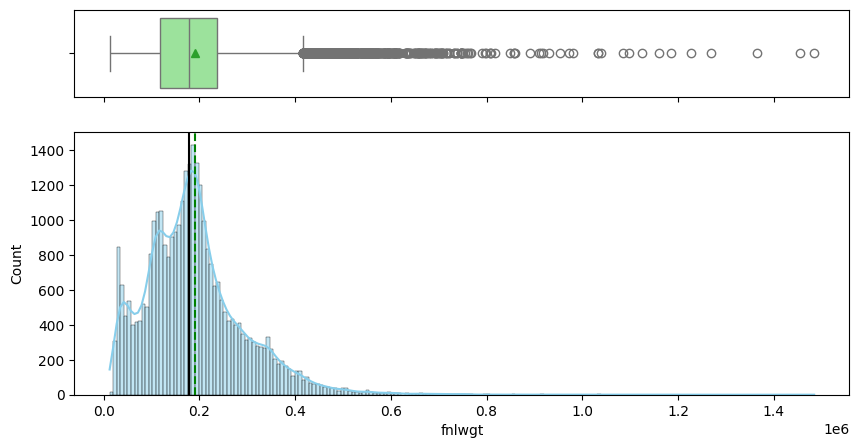

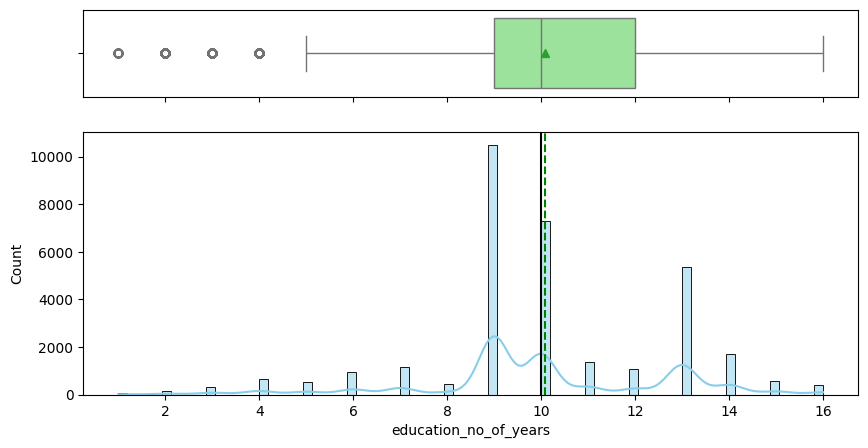

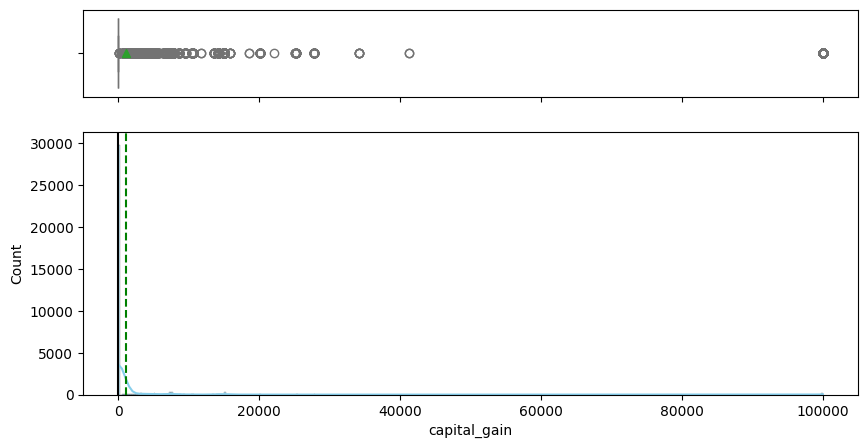

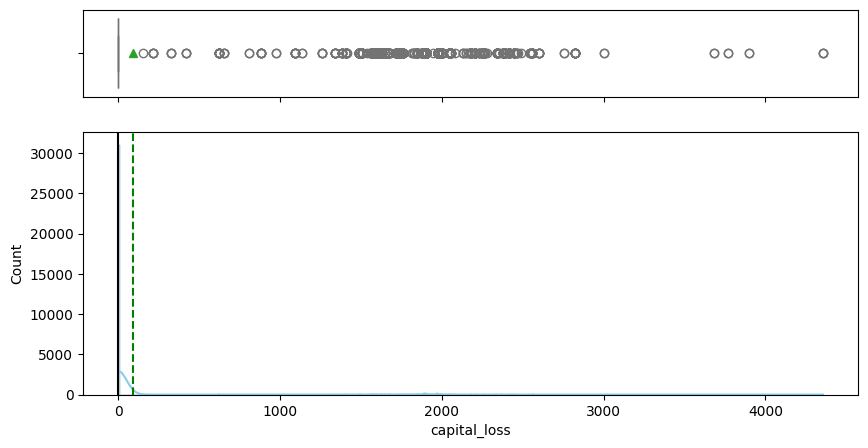

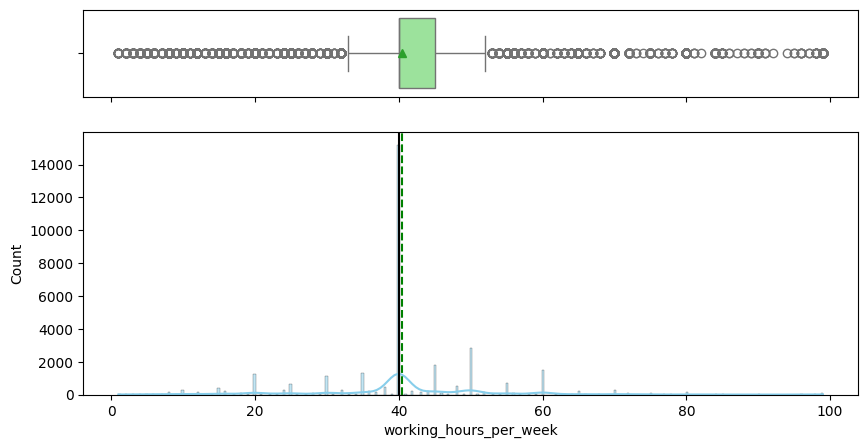

In [34]:
for i in numeric_cols:
    histogram_boxplot(df_clean, i)

- `Age` although has distribution from 18-90 years, but majority are from 20-45
- `fnlwgt` Weight assigned by Current Population Survey (CPS) has skewed distribution. 
- `education_no_of_years` - most of them have around 8-11 yrs
- `capital_gain` most have less than 0
- `capital_loss` most of them have less than 0
- `working_hours_per_week` most work from 30 to 50 hours

#### Univariate Analysis on Categorical Columns

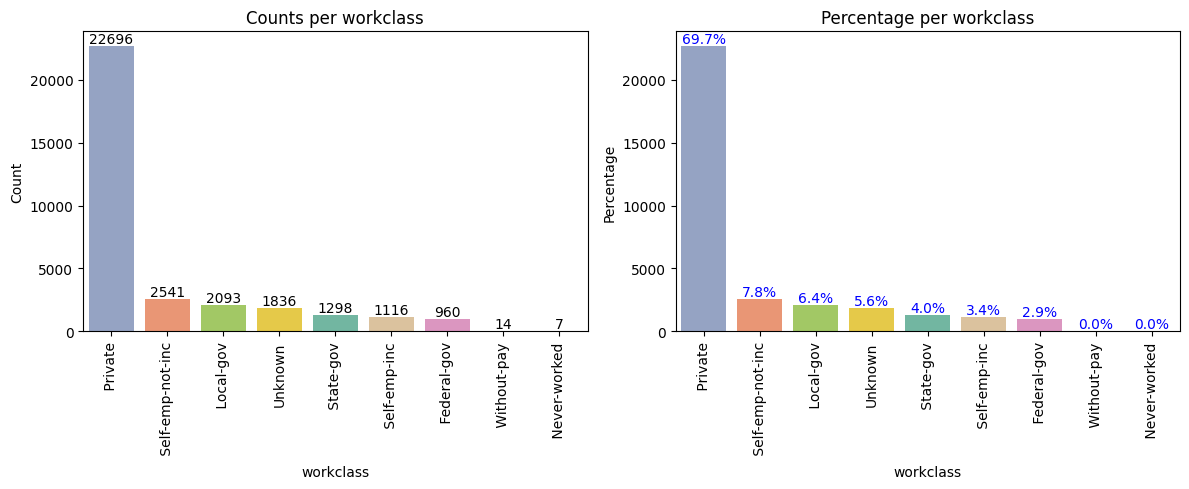

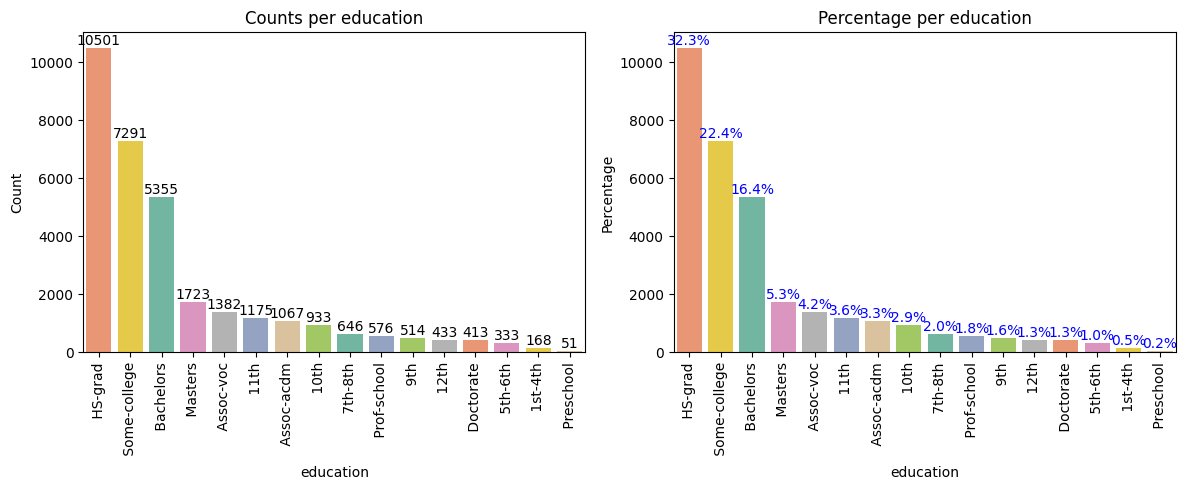

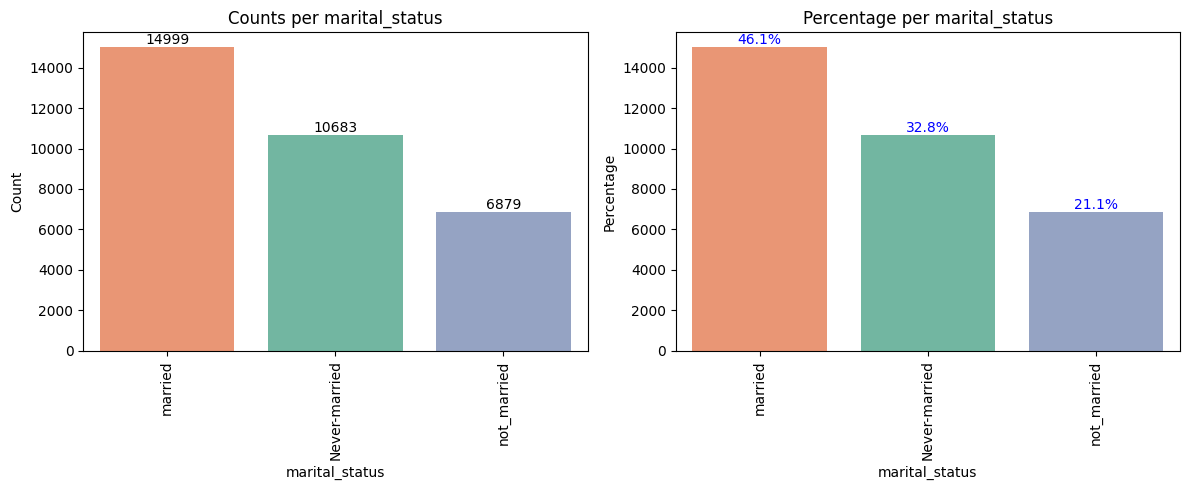

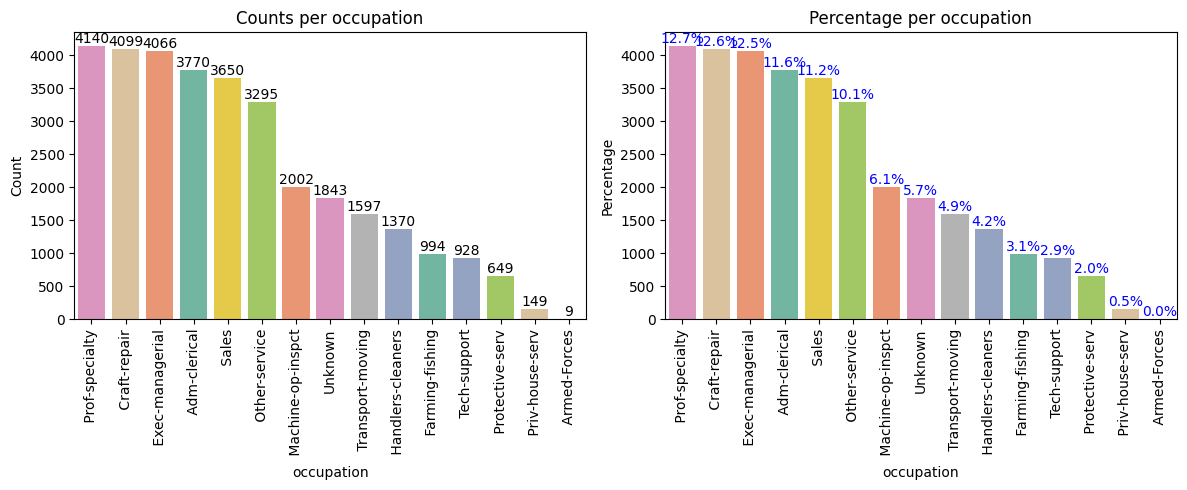

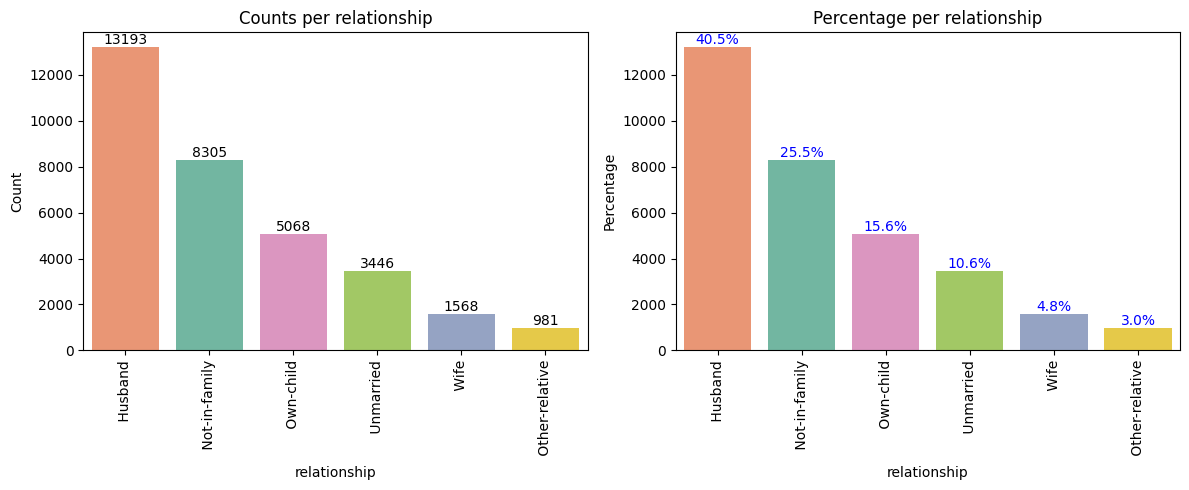

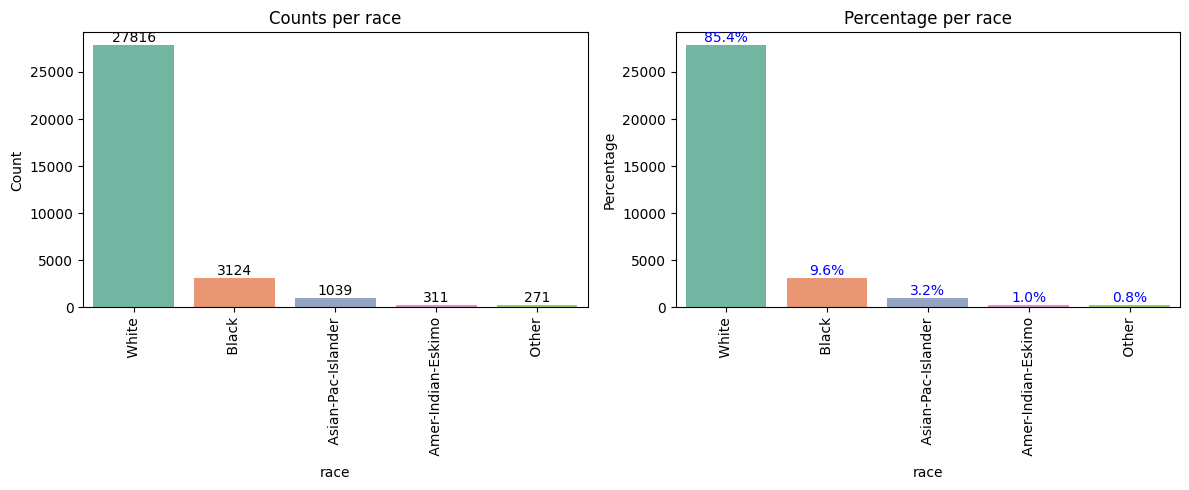

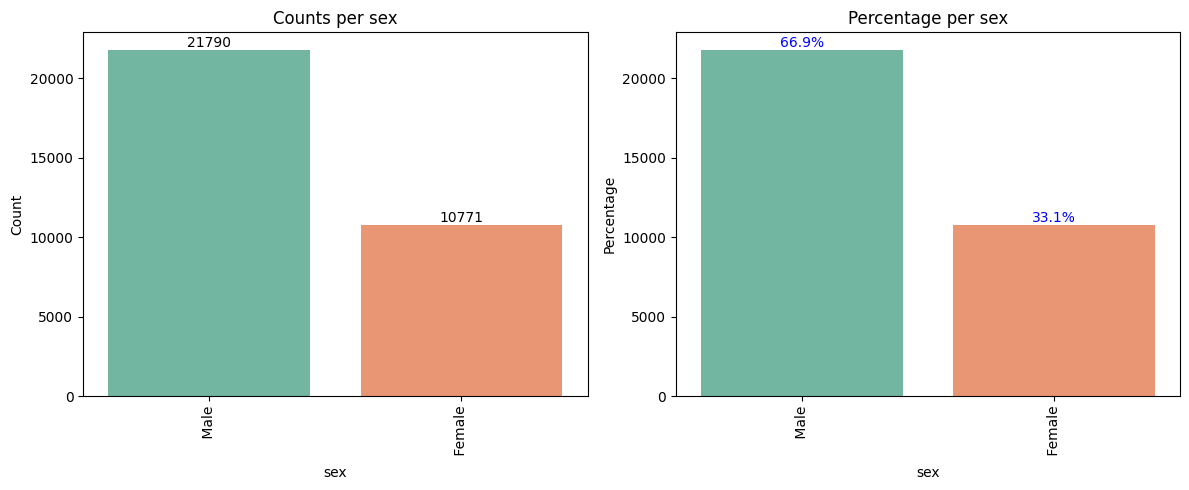

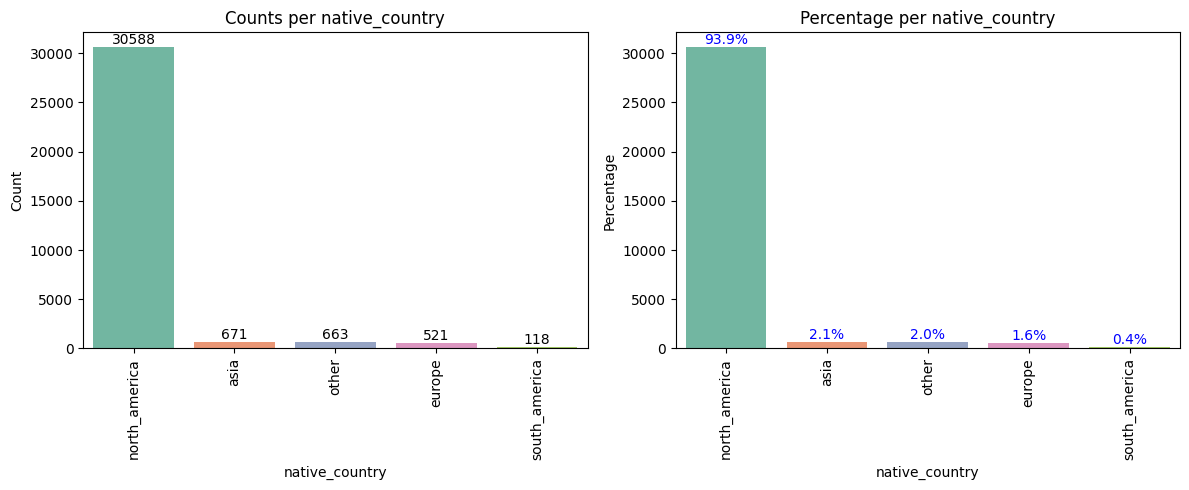

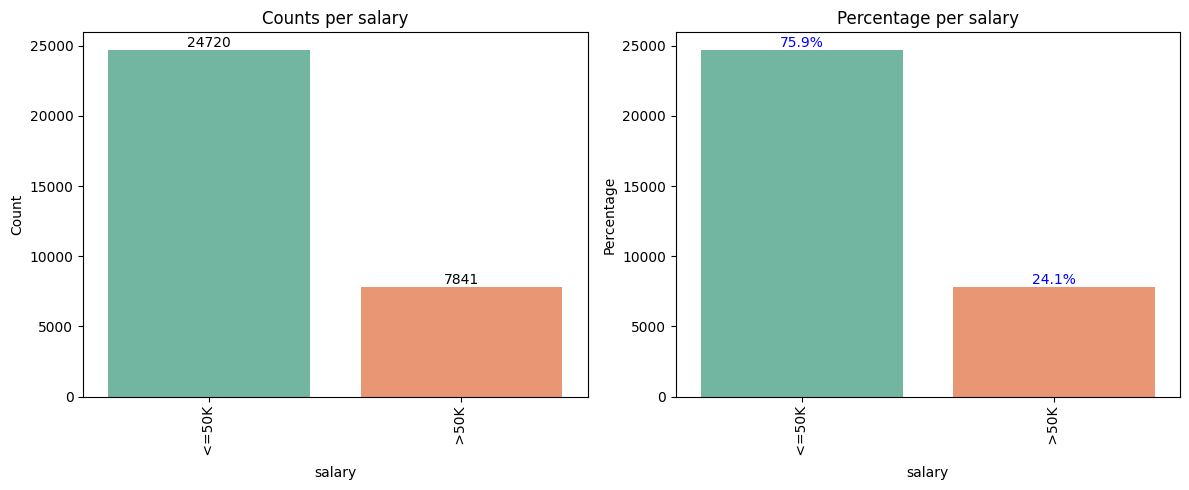

In [35]:
for i in cat_cols:
    plot_count_and_percentage_barplot(df_clean, i)

- `workclass` almost 70% are employed by Private
- `education` 32% are high school graduate, followed by some college 22% and then Bachelors are 16%
- `marital_status` 46% are married and 33% are never married
- `occupation` there is wide variety of occupation
- `relationship` 40% are husband
- `race` 85% data belongs to white ethnicity
- `sex` almost 67% are male
- `native_country` 94% are North American
- `salary` almost 76% make more than 50K

#### Bivariate Analysis

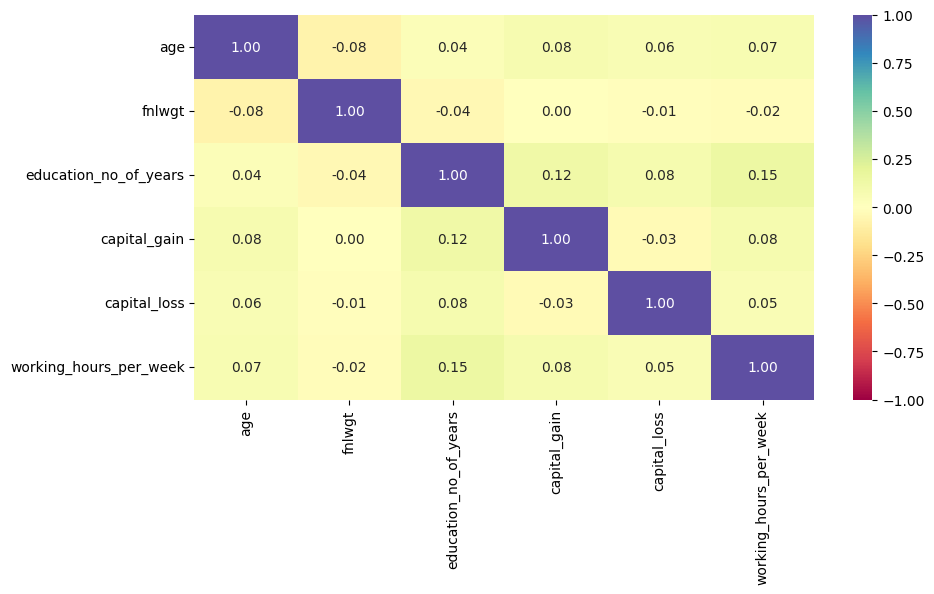

In [36]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

*Not much correlation among numeric features*

#### Categorical data vs Target Salary

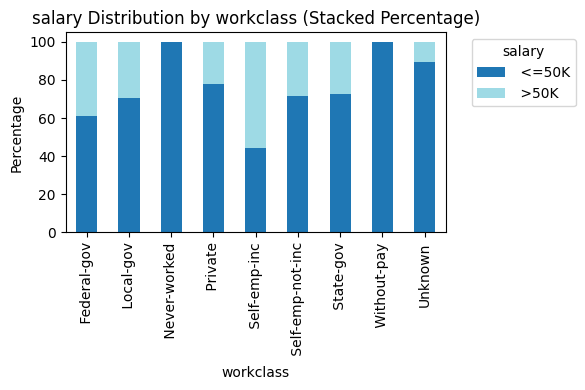

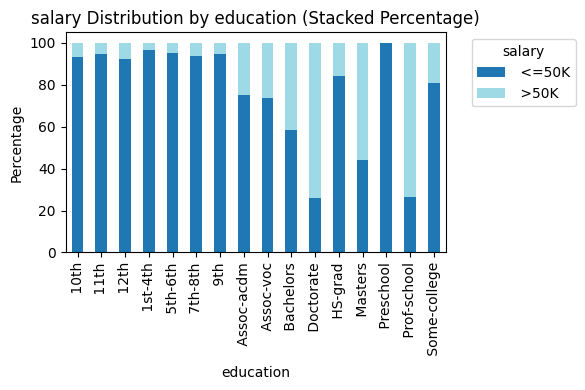

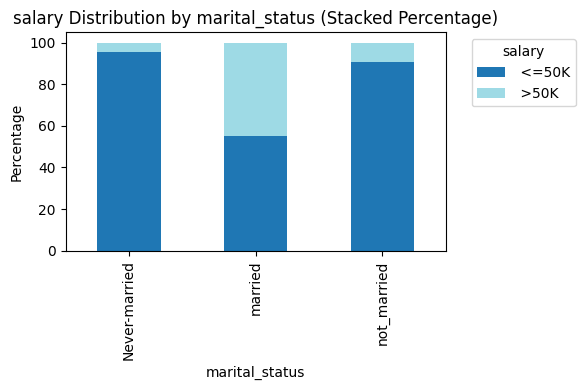

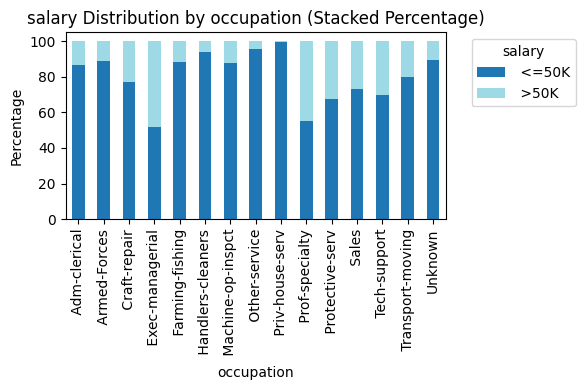

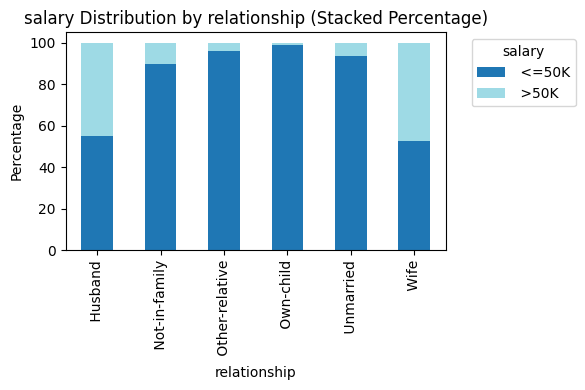

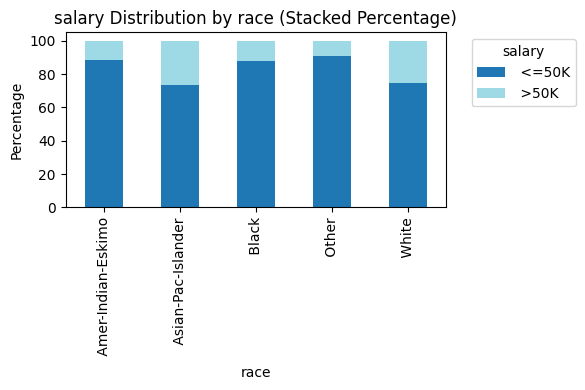

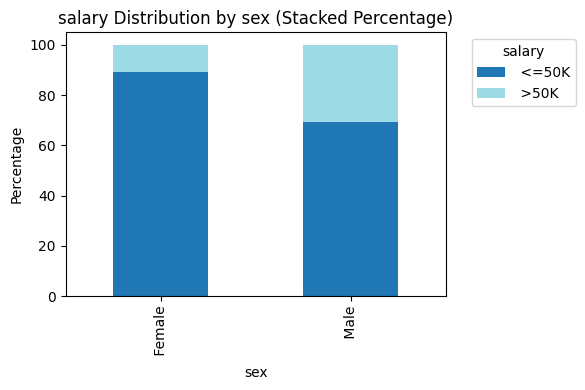

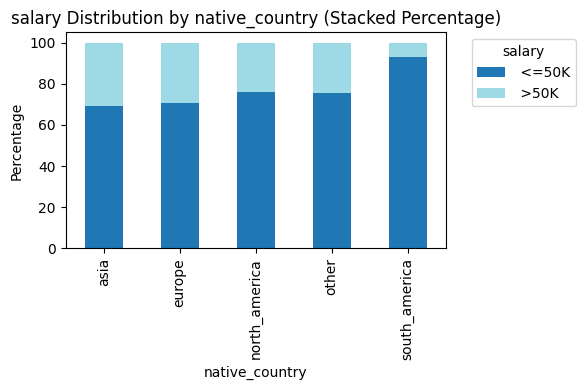

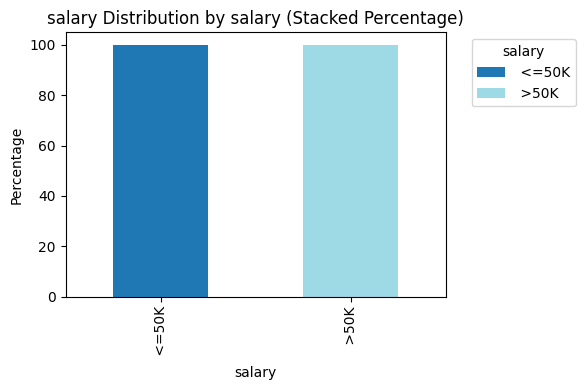

In [37]:
for col in cat_cols:
    plot_stacked_percentage_bar(df_clean, col, 'salary', title=f'salary Distribution by {col} (Stacked Percentage)')

- `workclass` from the data, work class have almost 60% earning more than 50K, followed by federal-gov who has 40% making more than 50K
- `education` almost 75% doctorates and professors earn more than 50K followed by masters who have close to 60% earning more than 50K
- `marital_status` almost 50% of married make more than 50K
- `occupation` execs and professors make more money as per the data. Close to 50% make more than 50K
- `relationship` husbands and wives have better salary, around 45% of them have salary more than 50K
- `race` asian pac islander and whites have most percentage, around 30% making more than 50K
- `sex` almost 38% males make more than 50K and only 17% or so females make more than 50K
- `native_country` among all of the native country, South American have most percentage ~ around 90% who earn less than 50K. Asia and Europe fair better with around 70% of them earning more than 50K

#### Numerical Data vs Target Feature `Salary`

`Age` vs `Salary`

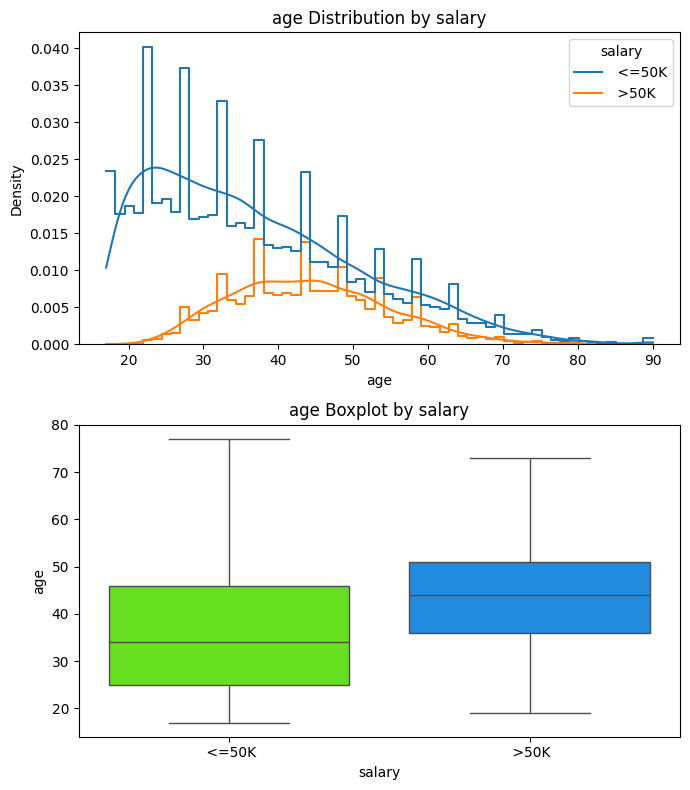

In [38]:
def num_feature_vs_target(data, predictor, target):
    fig, axes = plt.subplots(2, 1, figsize=(7, 8))  # 2 row and 1 column

    # Histogram with KDE
    sns.histplot(data=data,x=predictor,hue=target,kde=True,stat="density",element="step",fill=False,ax=axes[0])
    axes[0].set_title(f"{predictor} Distribution by {target}")

    # Boxplot
    sns.boxplot(data=data,x=target,y=predictor,hue=target,palette="gist_rainbow",showfliers=False,ax=axes[1])
    axes[1].set_title(f"{predictor} Boxplot by {target}")

    plt.tight_layout()
    plt.show()

num_feature_vs_target(df_clean, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

* `salary vs working_hours_per_week`:

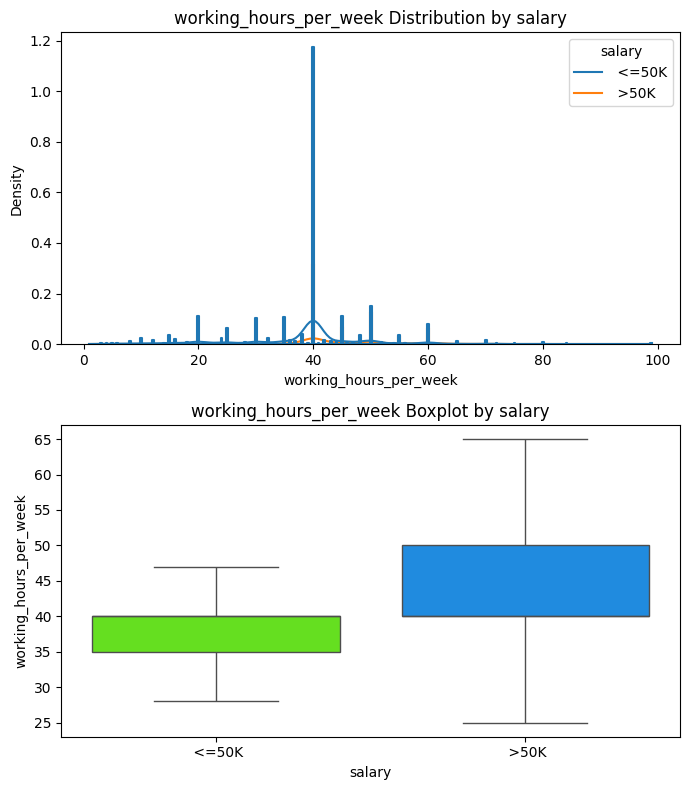

In [39]:
num_feature_vs_target(df_clean, "working_hours_per_week", "salary")

*Majority of people having above 50K salary work around 40 hours per week.*

### Data Pre-Processing

* Dropping capital_gain and capital_loss, as most of them have zero
* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

In [40]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

**Outliers detection using boxplot**

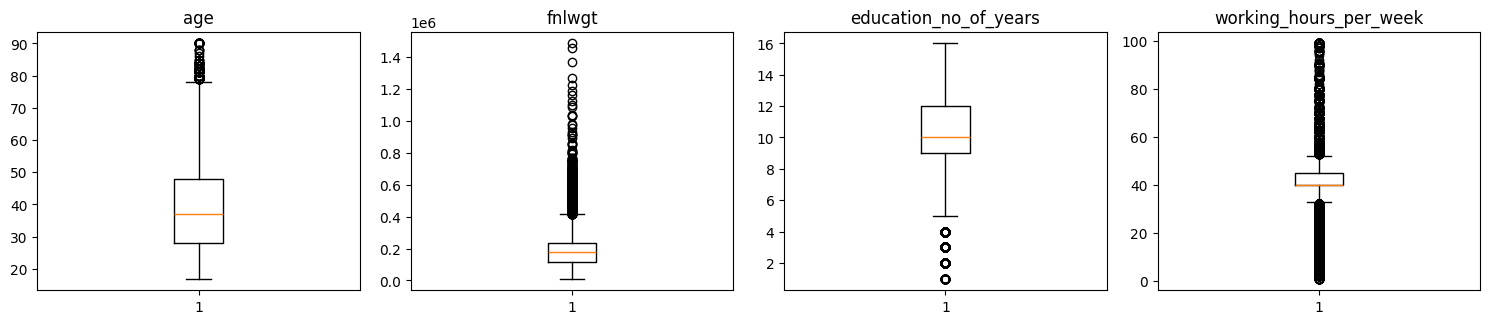

In [41]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers. 
* education_no_years has lower outliers. 
* working_hours_per_week has both upper and lower outliers.

### Treating Outliers

In [42]:
# functions to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

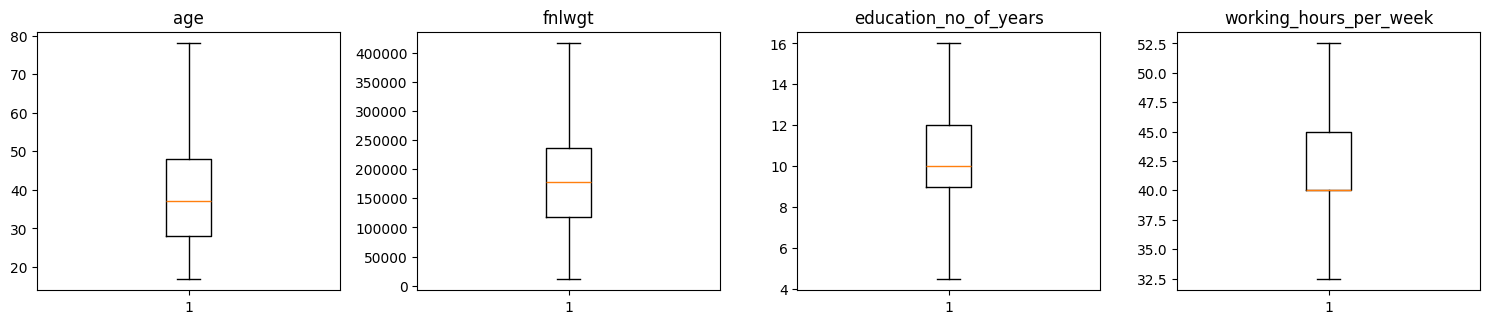

In [43]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Data Preparation

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

In [44]:
data["salary"] = data["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

**Creating training and test sets.**

In [45]:
X = data.drop(["salary"], axis=1)
Y = data["salary"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [46]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (22792, 57)
Shape of test set :  (9769, 57)
Percentage of classes in training set:
salary
1    0.753335
0    0.246665
Name: proportion, dtype: float64
Percentage of classes in test set:
salary
1    0.772853
0    0.227147
Name: proportion, dtype: float64


#### Model Building

#### Model can make wrong predictions as:
1. Predicting a person has a salary <=50K `(1)` but in reality the salary of the person is >50K `(0)` `False Positive`. 
2. Predicting a person doesn't have a salary <=50K `(1)` but in reality the salary of the person is <=50k `(0)` `False Negative`.

*Both the cases are important as:*

* If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.
* If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.

*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [47]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [48]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Logistic Regression

In [49]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1, max_iter=5000)
# lg = LogisticRegression(solver="liblinear", random_state=1)
model = lg.fit(X_train, y_train)

/Users/nirmalkumar/Documents/AIML Repository/venv/lib/python3.13/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/nirmalkumar/Documents/AIML Repository/venv/lib/python3.13/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


#### Checking model performance on training set

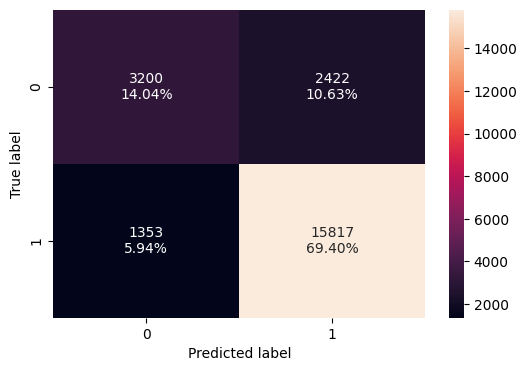

In [50]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [51]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.834372,0.9212,0.867208,0.893389


#### Checking performance on test set

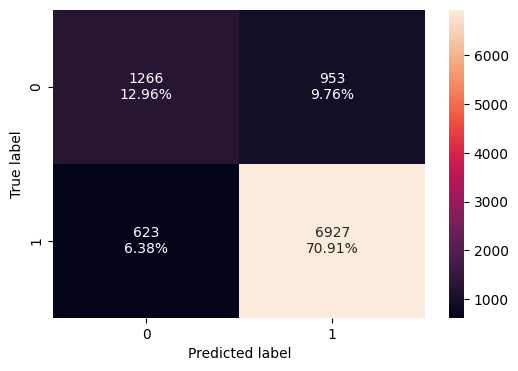

In [52]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [53]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.838673,0.917483,0.879061,0.897861


#### ROC-AUC

* The area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at distinguishing between classes.

#### 1.  predict_proba

Predicts the probabilities for the class 0 and 1. 

**Input**: Train or test data 

**Output**: Returns the predicted probabilities for class 0 and 1

#### 2. roc_curve_score 

Returns the auc scores

**Input**: 
         1. Training data
         2. Predicted Probability
         
**Output**: AUC scores between 0 and 1
 
#### 3. roc_curve

Returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
 
**Input:** 
        1. Training data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

* ROC-AUC on training set

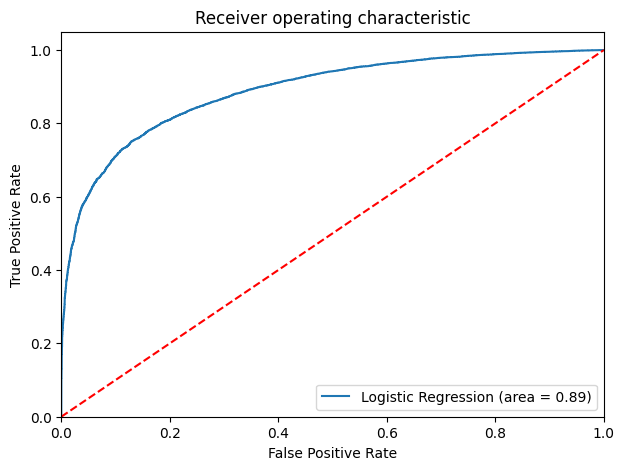

In [54]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

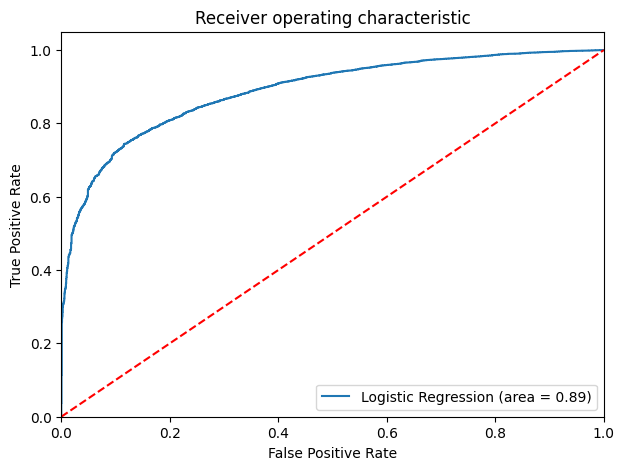

In [55]:
# Find the roc auc score for training data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

Optimal thresold is the value that best separated the True positive rate and False positive rate. 



In [56]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.7754948861136058


#### Checking model performance on training set

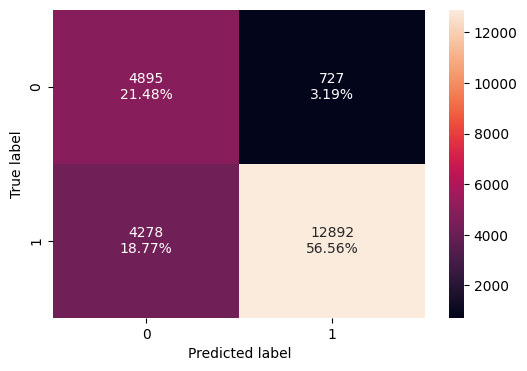

In [57]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [58]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.780405,0.750844,0.946619,0.837442


#### Checking model performance on test set

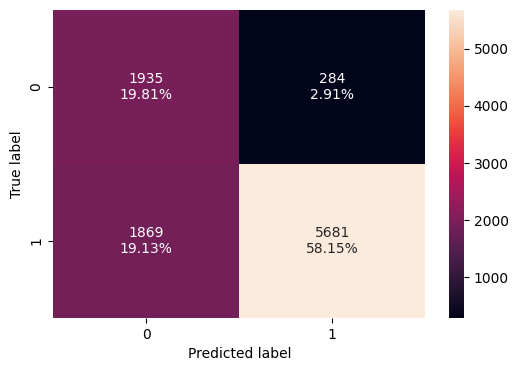

In [59]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [60]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.779609,0.75245,0.952389,0.840696


* The precision of the model for both training and test set has improved but the F1 score has reduced.

#### Let's use Precision-Recall curve and see if we can find a better threshold

The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement. 

#### precision_recall_curve()

Returns the fpr, tpr and threshold values

**Input:** 
        1. Original data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

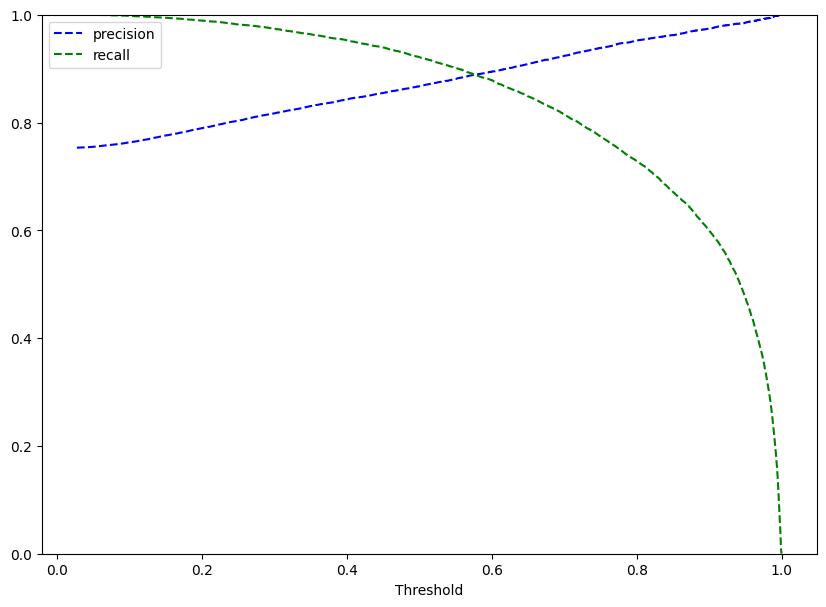

In [61]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,) # precision-recall curve

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision.

In [62]:
# setting the threshold
optimal_threshold_curve = 0.58

#### Checking model performance on training set

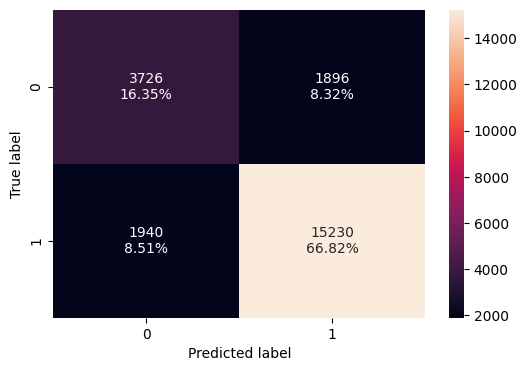

In [63]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [64]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.831695,0.887012,0.889291,0.88815


#### Checking model performance on test set

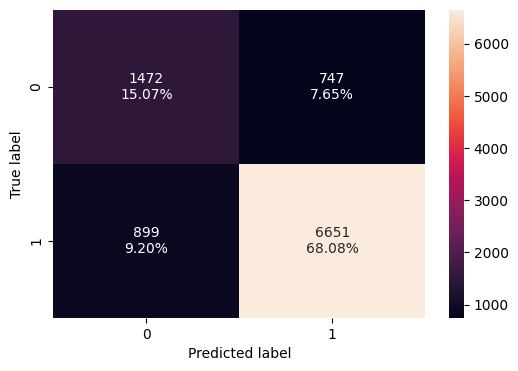

In [65]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [66]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.831508,0.880927,0.899027,0.889885


* Model is performing well on training and test.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

### Model Performance Summary

In [67]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.77 Threshold",
    "Logistic Regression-0.58 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.77 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.834372,0.780405,0.831695
Recall,0.921200,0.750844,0.887012
Precision,0.867208,0.946619,0.889291
F1,0.893389,0.837442,0.888150


In [68]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.77 Threshold",
    "Logistic Regression-0.58 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.77 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.838673,0.779609,0.831508
Recall,0.917483,0.752450,0.880927
Precision,0.879061,0.952389,0.899027
F1,0.897861,0.840696,0.889885


#### Thank You !!!